In [2]:
import os
import sys
import csv
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import utils
from dg_maxwell import lagrange
from dg_maxwell import wave_equation_2d as w2d
from dg_maxwell import msh_parser
from dg_maxwell import isoparam

af.set_backend(params.backend)
af.set_device(params.device)

In [3]:
nodes, elements = msh_parser.read_order_2_msh('read_and_plot_mesh/mesh/square_10_10.msh')

gmshTranslator: Initializing...
gmshTranslator: Mesh has 441 nodes.
gmshTranslator: Mesh has 144 elements.
gmshTranslator: Processed 589 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements


In [58]:
def u_init(x, y):
    return np.e**(-(x**2 + y**2) / 0.4**2)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


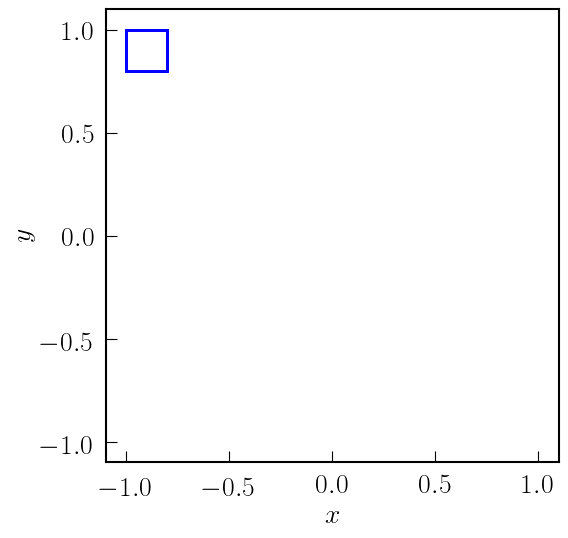

In [36]:
axes_handler = plt.axes()

# for element_id in np.arange(10, 20):
element_id = 0
msh_parser.plot_element_boundary(nodes[elements[element_id], 0],
                                 nodes[elements[element_id], 1],
                                 axes_handler)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')
# plt.savefig('square.png')
plt.show()


In [59]:
N_LGL   = 8
x_e_ij  = af.np_to_af_array(np.zeros([N_LGL * N_LGL, len(elements)]))
y_e_ij  = af.np_to_af_array(np.zeros([N_LGL * N_LGL, len(elements)]))

xi_LGL  = lagrange.LGL_points(N_LGL)
eta_LGL = lagrange.LGL_points(N_LGL)

Xi_LGL, Eta_LGL = utils.af_meshgrid(xi_LGL, eta_LGL)
xi_i  = af.flat(Xi_LGL)
eta_j = af.flat(Eta_LGL)

for element_tag, element in enumerate(elements):
    x_e_ij[:, element_tag] = isoparam.isoparam_x_2D(nodes[element, 0], xi_i, eta_j)
    y_e_ij[:, element_tag] = isoparam.isoparam_y_2D(nodes[element, 1], xi_i, eta_j)


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [60]:
u_e_ij = u_init(x_e_ij, y_e_ij)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


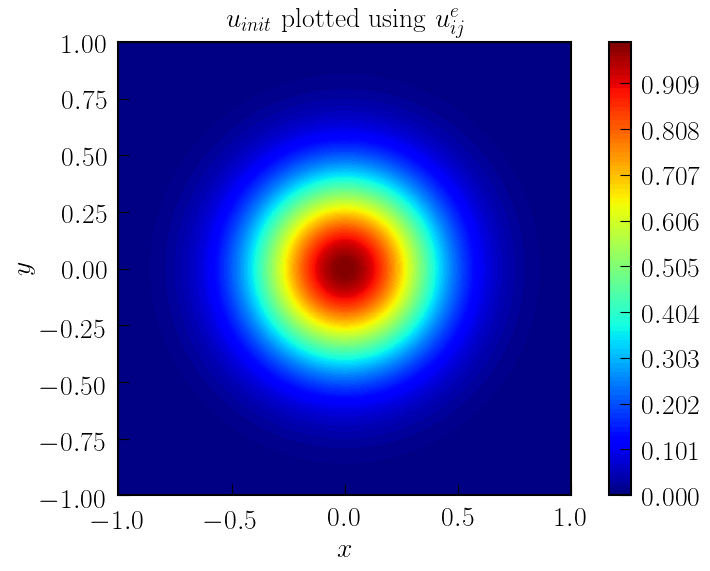

In [61]:
color_levels = np.linspace(0., 1., 100)

for element_tag in np.arange(len(elements)):
    print(element_tag)
    plt.contourf(np.array(af.moddims(x_e_ij[:, element_tag], d0 = N_LGL, d1 = N_LGL)),
                 np.array(af.moddims(y_e_ij[:, element_tag], d0 = N_LGL, d1 = N_LGL)),
                 np.array(af.moddims(u_e_ij[:, element_tag], d0 = N_LGL, d1 = N_LGL)),
                 200, levels = color_levels, cmap = 'jet')

plt.axes().set_aspect('equal')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r'$u_{init}$ plotted using $u^e_{ij}$')
plt.colorbar()

plt.savefig('u_e_ij.png')
plt.show()